In [35]:
import cv2
import matplotlib.pyplot as plt
import csv
# Import datasets, classifiers and performance metrics
from skimage.feature import hog
from skimage.transform import resize
from sklearn import datasets, svm, metrics
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import skimage.io as io
from commonfunctions import *
import pandas as pd
import os
from skimage import img_as_ubyte
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from imutils import contours as imcnts

In [66]:
def biggest_contour(contours):
    biggest = np.array([])
    max_peri = 0
    for i in contours:
        peri = cv2.arcLength(i, True)
        if peri > max_peri:
            biggest = i
            max_peri = peri
    return biggest

['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


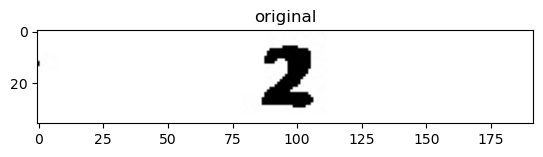

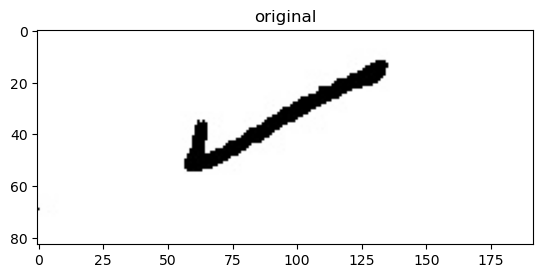

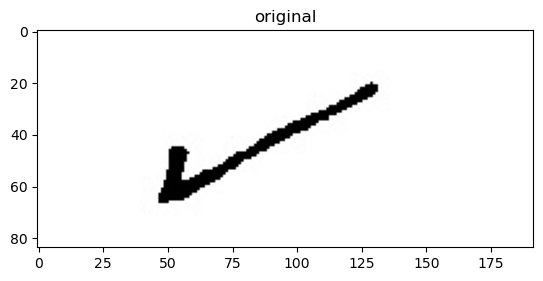

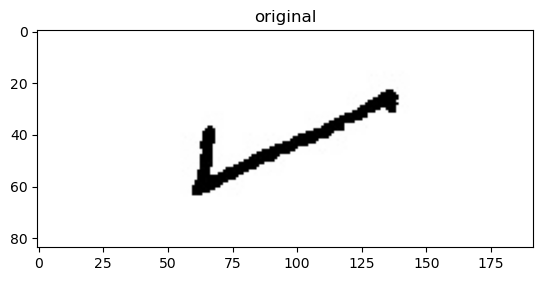

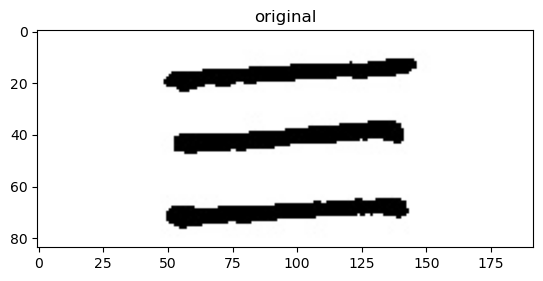

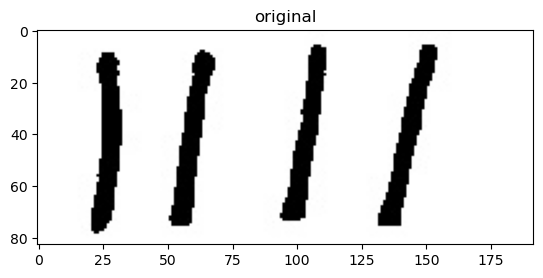

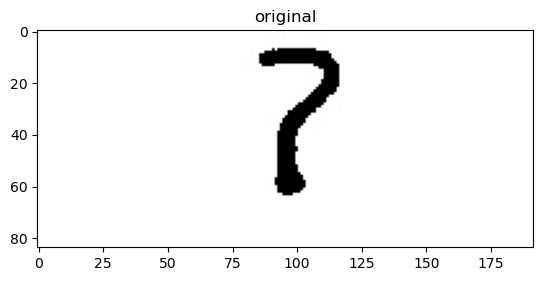

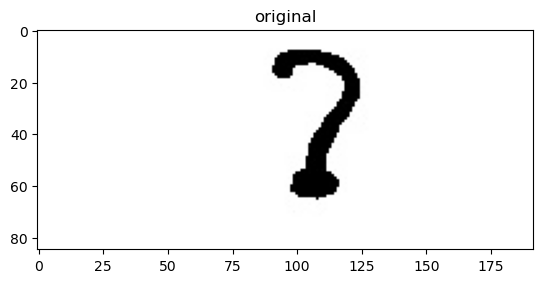

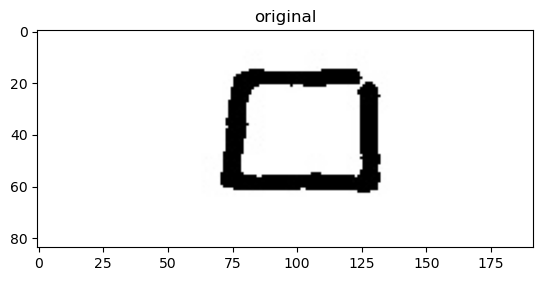

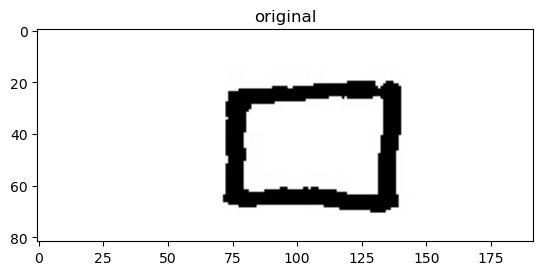

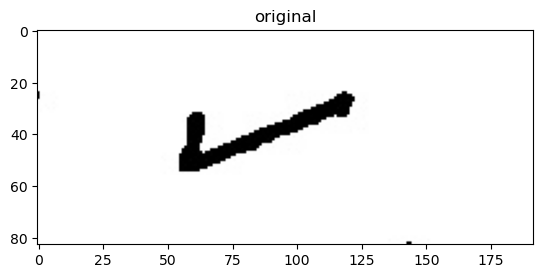

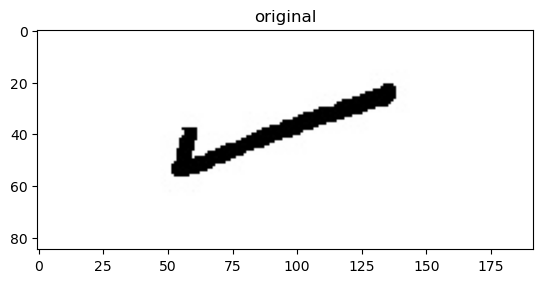

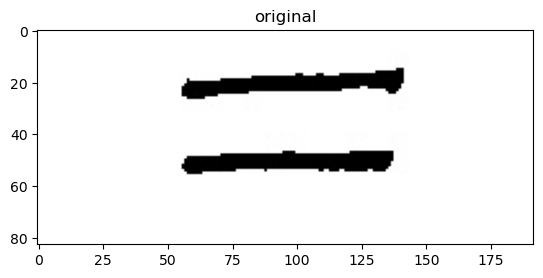

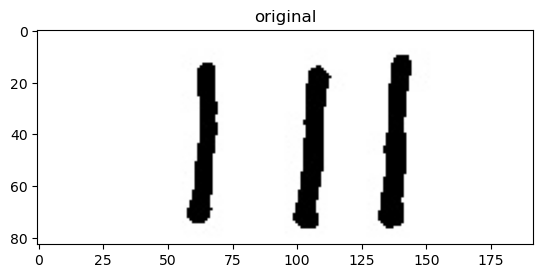

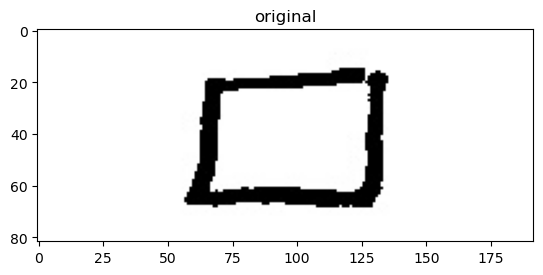

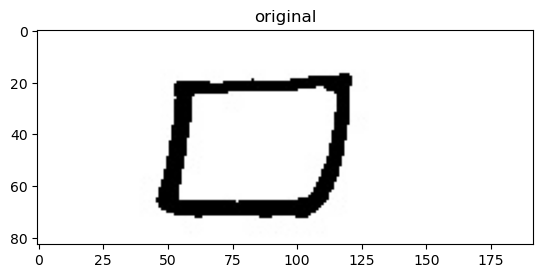

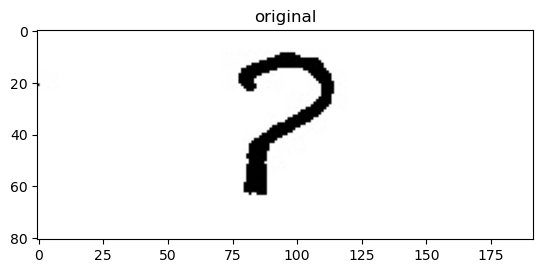

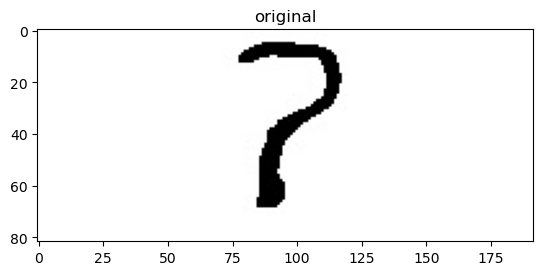

In [144]:
imgList = os.listdir('../../Results/Results/7/4')
print(imgList[:])
imgsPath = "../../Results/Results/7/4/"
imgs = []
warped_path = "./warpedImgs/"
for imgName in imgList:
    img = cv2.imread(imgsPath+imgName)
    imgs.append(img)
    show_images([img], ['original'])
imgs_original = imgs[:]

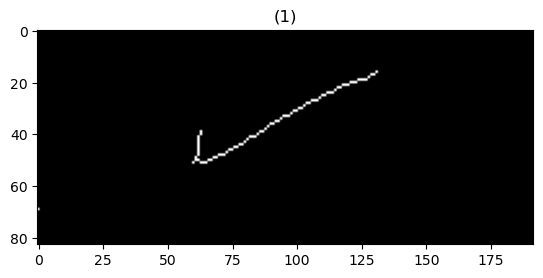

None


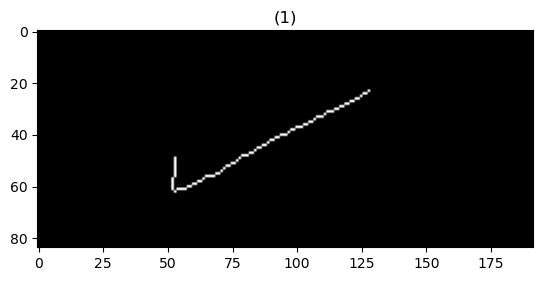

None


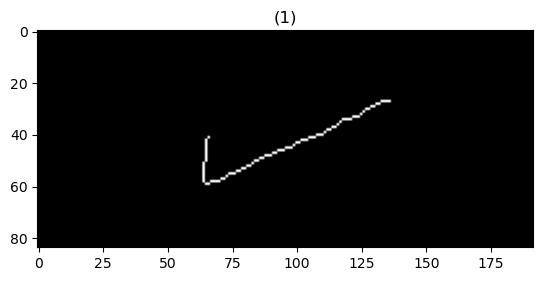

None


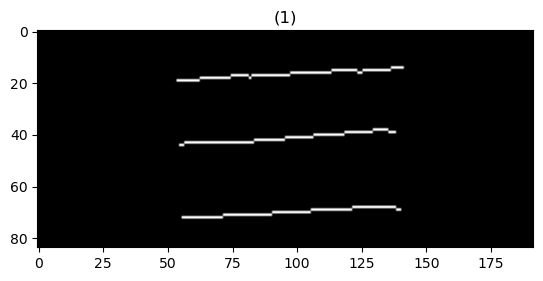

None


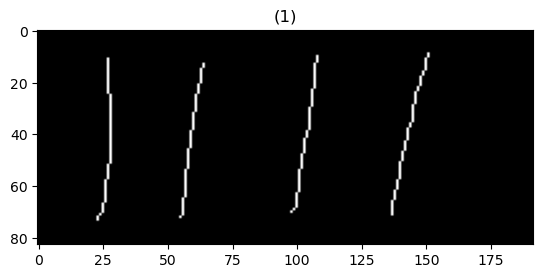

None


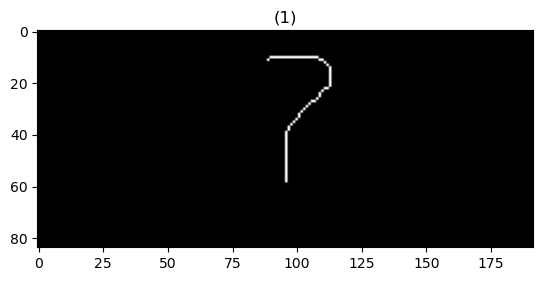

[[[95.5 20.5 12.5]]]
Area:  0.0
Peri:  234.85281229019165


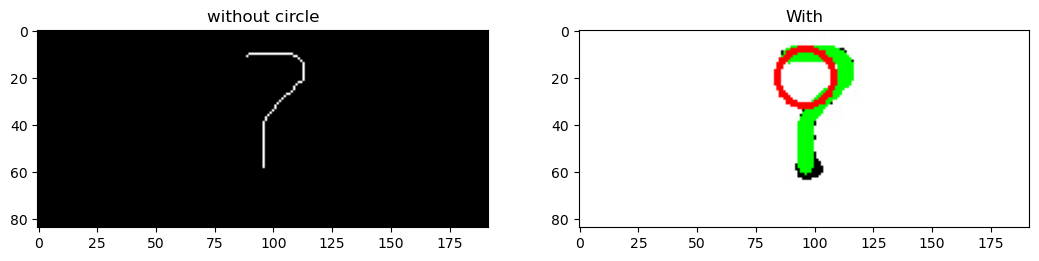

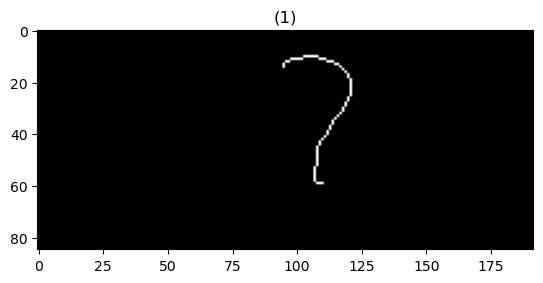

[[[104.5  23.5  14.6]]]
Area:  0.0
Peri:  242.30865597724915


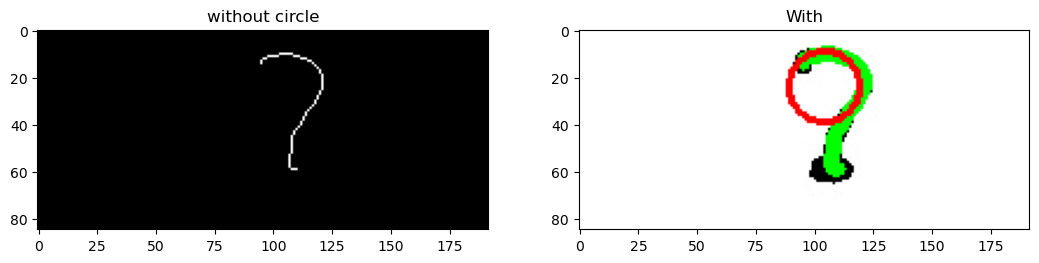

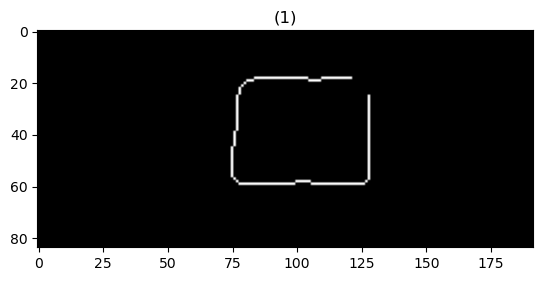

None


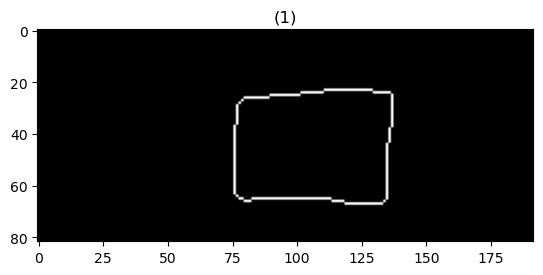

None


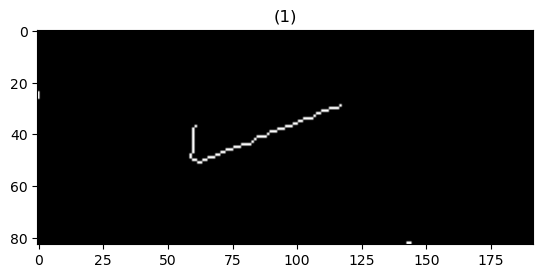

None


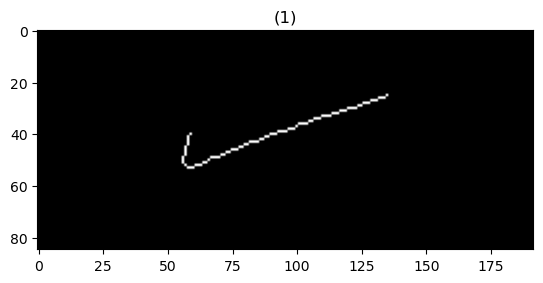

None


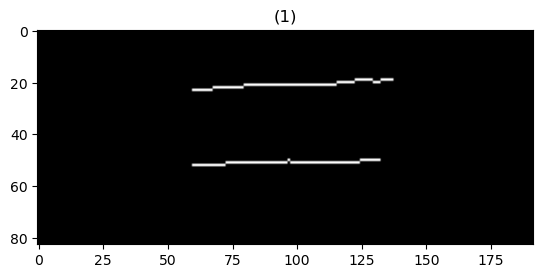

None


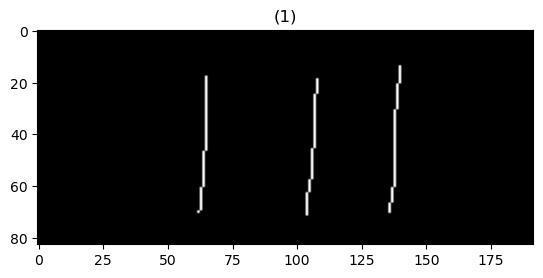

None


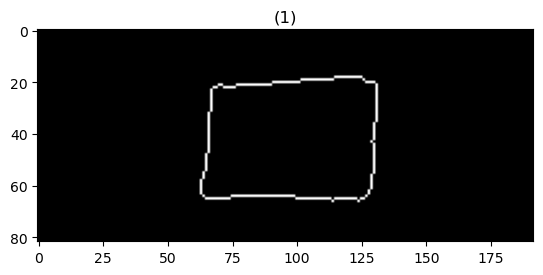

[[[119.5  47.5  11.8]]]


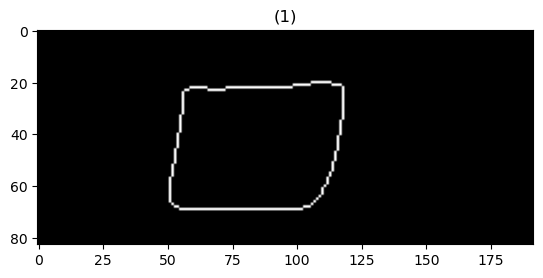

None


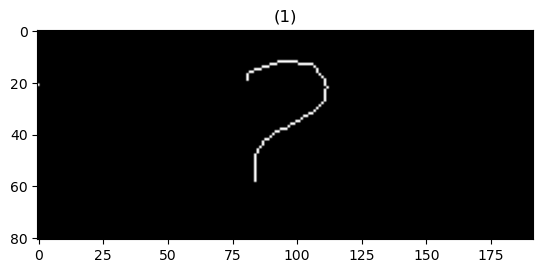

[[[95.5 25.5 14.7]]]
Area:  0.0
Peri:  279.76449966430664


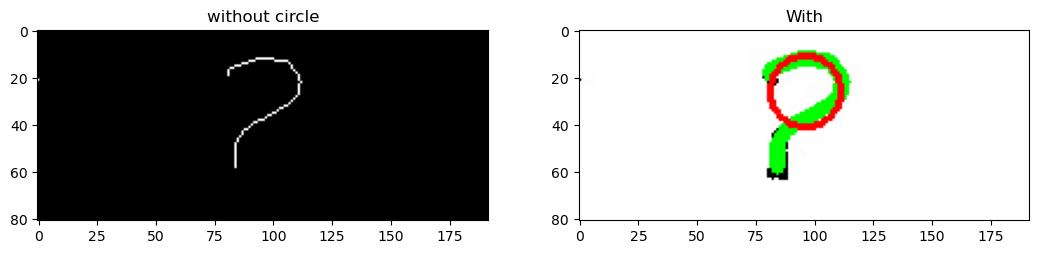

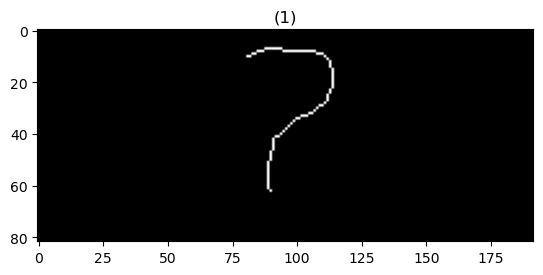

[[[100.5  20.5  13.8]]]
Area:  0.0
Peri:  300.0365778207779


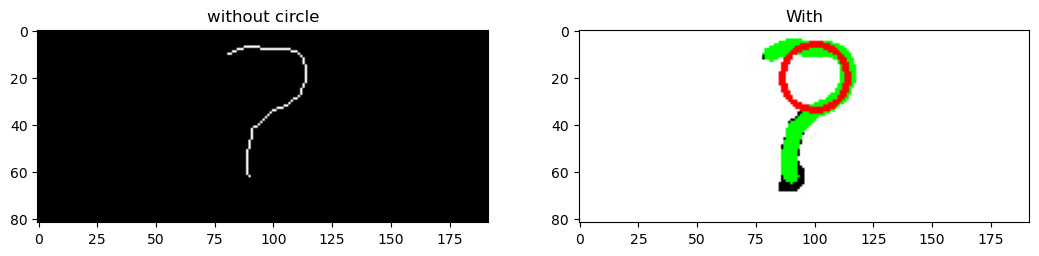

In [145]:
# img = cv2.imread('./imgs/10.jpg')
for img, orig in  zip(imgs[1:], imgs_original[1:]):
    img = cv2.bilateralFilter(img, 20, 30, 30)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img= cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
             cv2.THRESH_BINARY_INV, 51, 15)
    img=skeletonize(img,method='lee')

    kernel = np.ones((4,4),np.uint8)
    kernel2 = np.ones((1,1),np.uint8)
    # img = cv2.dilate(img.copy(), kernel, 5)
    # img = cv2.erode(img.copy(), kernel, 5)
    # img = cv2.medianBlur(img,5)
    rows = img.shape[0]

    show_images([img])
    # img = 255-img
    lines_ver = cv2.HoughLinesP(img,1,np.pi/300,threshold=25,maxLineGap=15)
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, rows/8,
                               param1=30, param2= 10,
                               minRadius=7, maxRadius=20)
    
#     print(lines_ver)
    print(circles)
    if circles is None:
        rows+=1
    else:
        circles = np.uint16(np.around(circles))
        
        pap_cnts,_=cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#         question_cnts,_=imcnts.sort_contours(pap_cnts,method='top-to-bottom')
        contours = sorted(pap_cnts, key=cv2.contourArea, reverse=True)
        cnt = biggest_contour(contours[:])
        cv2.drawContours(orig,[cnt],-1,(0,255,0), 5)
#         cnt = contours[0]
        (x,y,w,h)=cv2.boundingRect(cnt)
        aspect_ratio=w/h
        peri = cv2.arcLength(cnt, True)
        if(cv2.contourArea(cnt)<1.5*peri and 1.5*peri<550):
            print('Area: ', cv2.contourArea(cnt))
            print('Peri: ', 1.5*peri)
            for pt in circles[0, :]:
                a, b, r = pt[0], pt[1], pt[2]

                # Draw the circumference of the circle.
                cv2.circle(orig, (a, b), r, 255, 2)

                # Draw a small circle (of radius 1) to show the center.
            #     cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
                show_images([img, orig], ['without circle', 'With'])

In [165]:
def detect_question_mark(img):
    img = cv2.bilateralFilter(img, 20, 30, 30)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img= cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
             cv2.THRESH_BINARY_INV, 51, 15)
    img=skeletonize(img,method='lee')

    kernel = np.ones((4,4),np.uint8)
    kernel2 = np.ones((1,1),np.uint8)
    # img = cv2.dilate(img.copy(), kernel, 5)
    # img = cv2.erode(img.copy(), kernel, 5)
    # img = cv2.medianBlur(img,5)
    rows = img.shape[0]

    show_images([img])
    # img = 255-img
    lines_ver = cv2.HoughLinesP(img,1,np.pi/300,threshold=25,maxLineGap=15)
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, rows/8,
                               param1=30, param2= 10,
                               minRadius=7, maxRadius=20)
    
#     print(lines_ver)
    print(circles)
    if circles is None:
        rows+=1
    else:
        circles = np.uint16(np.around(circles))
        
        pap_cnts,_=cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#         question_cnts,_=imcnts.sort_contours(pap_cnts,method='top-to-bottom')
        contours = sorted(pap_cnts, key=cv2.contourArea, reverse=True)
        cnt = biggest_contour(contours[:])
        cv2.drawContours(orig,[cnt],-1,(0,255,0), 5)
#         cnt = contours[0]
        (x,y,w,h)=cv2.boundingRect(cnt)
        aspect_ratio=w/h
        peri = cv2.arcLength(cnt, True)
        if(cv2.contourArea(cnt)<1.5*peri and 1.5*peri<550):
            return True;
        
    return False;y


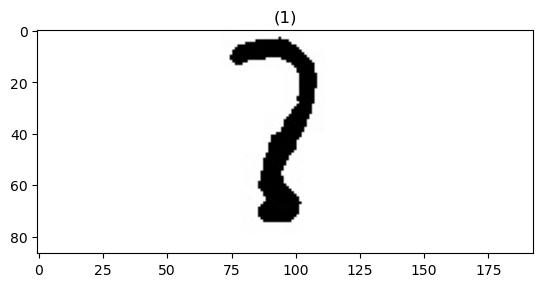

True


In [167]:
img  = cv2.imread("../../Results/Results/10/5/1.jpg")
show_images([img])
print(detect_question_mark(img))